# Classification
## Logistic Regression

This technique is named as <b> ‘Logistic Regression’ </b>, because it’s underlying technique is quite the same as Linear Regression. The term <b>“Logistic”</b> is taken from the <b>Logit function</b> that is used in this method of classification.

The method it is using is called logs of <b>"odds"</b> probability.

Lets find out why we can not use Linear Regression here. Assume we are predicting wheather a patient has cancer or not based on his Tumor size. Lets do some visualization

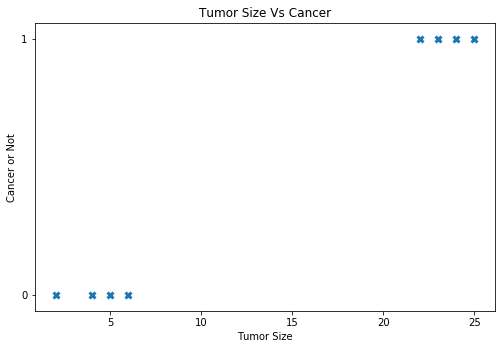

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# x stands for Tumor sise
x = np.array([5,6,2,4, 24,25,23,22])

# y stands for wheather the patient has cancer or not
y = np.array([0,0,0,0,  1,1,1,1])

fig = plt.figure(figsize = (8,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes

ax.scatter(x,y, marker ='x', lw = 3)
ax.set_title('Tumor Size Vs Cancer')
ax.set_xlabel('Tumor Size')
ax.set_ylabel('Cancer or Not')
ax.set_yticks([0,1]);

#### Let's put a linear regression line in the scatter plot by using our hypothesis fuction - $ h_{0}(\theta) = \theta_{0} + \theta_{1}\times x $ 
Then put a thrsold value or make a decision bounday.

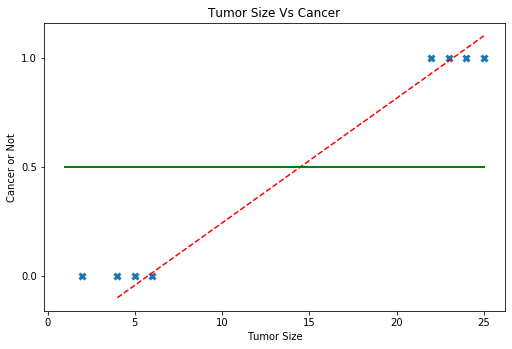

In [100]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes

ax.scatter(x,y, marker ='x', lw = 3)
ax.set_title('Tumor Size Vs Cancer')
ax.set_xlabel('Tumor Size')
ax.set_ylabel('Cancer or Not')
ax.set_yticks([0,.5,1])

ax.plot([4,25], [-.1,1.1], 'r--');

ax.plot(np.linspace(1,x.max(), 10), np.ones(10)*.5, 'g', lw = 2);

Given any tumor size, we are able to predict the value along the Y-axis. If Y is greater than 0.5 (above the green line), predict that this paitient has cancer otherwise has not.

Lets discuss what are the problems for this -
## Problem- 1: Predicted value is continuous, not probabilistic
In a binary classification problem, what we are interested in the probability of y value. Probability is ranged between 0 and 1, where the probability of something certain to happen is 1, and 0 is something will not happen. But in linear regression, we are predicting an absolute number, which can range outside 0 and 1.

For example - If any one has a tumor soze of 45 then the predicted value will be greater than 1. Which is not correct because the range of probability is (0 to 1)

## Problem- 2: Sensitive to imbalance data
Lets see the bellow chart. Here we have added some mode points(Yellow marked) which belongs to either class 1 or class 0. But think is our regression line can really predict them ?

No, it will not.

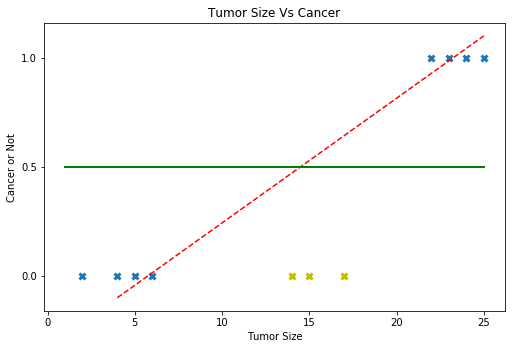

In [102]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes

ax.scatter(x,y, marker ='x', lw = 3)
ax.set_title('Tumor Size Vs Cancer')
ax.set_xlabel('Tumor Size')
ax.set_ylabel('Cancer or Not')
ax.set_yticks([0,.5,1])

ax.plot([4,25], [-.1,1.1], 'r--');

ax.plot(np.linspace(1,x.max(), 10), np.ones(10)*.5, 'g', lw = 2)

ax.scatter([14,15,17],[0,0,0], marker ='x', color = 'y', lw = 3);

For resolving those problem insted of linear regression we use logistic regression. In logistic regression instead of hypothesis
of straigt line - 
## $$ h_{0}(\theta) = \theta_{0} + \theta_{1}\times x $$

We use sigmoid function - 
## $$ \sigma  (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-x} }  $$ 

This function will give us a chart like bellow -
From bellow chart We Can easily identify any class

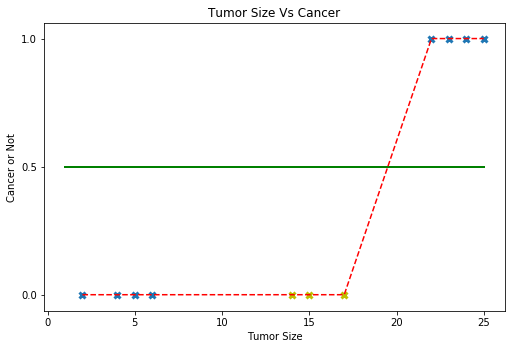

In [129]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes


ax.scatter(x,y, marker ='x', lw = 3)
ax.set_title('Tumor Size Vs Cancer')
ax.set_xlabel('Tumor Size')
ax.set_ylabel('Cancer or Not')
ax.set_yticks([0,.5,1])

ax.plot(np.linspace(1,x.max(), 10), np.ones(10)*.5, 'g', lw = 2)
ax.scatter([14,15,17],[0,0,0], marker ='x', color = 'y', lw = 3);


x_new = np.sort(np.append(x, np.array([14,15,17])))
y_new = np.array([0,0,0,0,0,0,0,1,1,1,1])


ax.plot(x_new, y_new, 'r--');

Lest's Find out how this sigmoid function came. Lets recap - Logistic regression is using logs of <b>"odds"</b> probability.
What is odds probability ? 

the probability of something certain to happen is 1, and 0 is something will not happen. Then 
## $$ Odds\;Probability\;(1) =  \frac{P(1)}{1-P(1)} $$
## $$ Odds\;Probability\;(0) =  \frac{P(0)}{1-P(0)} $$

### Intution of Sigmoid Function - <br> <br>
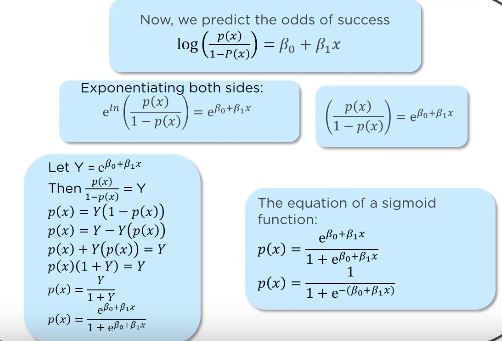

# $\frac {x^{2}}{1+x^{2}}$
# $\frac {1} {\frac{1}{x^2}+{1}}$

# $\frac{1}{x^{-2} + 1 }$

# $\frac {1}{1+x^{-2}}$

In [191]:
import pandas as pd
Cancer = pd.read_csv('Cancer.csv')

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(np.array(Cancer['Tumor_Size']).reshape(-1,1), Cancer['Cancer'])


predictions = classifier.predict(np.array(Cancer['Tumor_Size']).reshape(-1,1))

from sklearn.metrics import accuracy_score, confusion_matrix

acc = accuracy_score(Cancer['Cancer'], predictions)

print('Our Model Accuracy is : {}'.format(acc))

cm = confusion_matrix(Cancer['Cancer'], predictions)


print('Confusion Matrix is :\n {}'.format(cm))



Our Model Accuracy is : 0.5
Confusion Matrix is :
 [[ 2 18]
 [ 3 19]]


In [192]:
21/42

0.5

In [193]:
probabilities = classifier.predict_proba(np.array(Cancer['Tumor_Size']).reshape(-1,1))
probabilities

array([[0.46460962, 0.53539038],
       [0.47048166, 0.52951834],
       [0.47226276, 0.52773724],
       [0.46727761, 0.53272239],
       [0.46887932, 0.53112068],
       [0.51440244, 0.48559756],
       [0.47315357, 0.52684643],
       [0.46585444, 0.53414556],
       [0.46656596, 0.53343404],
       [0.4804642 , 0.5195358 ],
       [0.50547142, 0.49452858],
       [0.45750528, 0.54249472],
       [0.46372073, 0.53627927],
       [0.45715049, 0.54284951],
       [0.45803754, 0.54196246],
       [0.46070027, 0.53929973],
       [0.46318751, 0.53681249],
       [0.45750528, 0.54249472],
       [0.46638807, 0.53361193],
       [0.4804642 , 0.5195358 ],
       [0.48296259, 0.51703741],
       [0.4863546 , 0.5136454 ],
       [0.51815105, 0.48184895],
       [0.524394  , 0.475606  ],
       [0.48653316, 0.51346684],
       [0.49510745, 0.50489255],
       [0.47529222, 0.52470778],
       [0.46354298, 0.53645702],
       [0.49242744, 0.50757256],
       [0.49207013, 0.50792987],
       [0.

In [178]:
df = pd.DataFrame(Cancer['Cancer'], pd.Series(predictions))

# print(Cancer['Cancer'], pd.Series(predictions))


In [184]:
pd.concat([Cancer['Cancer'], pd.Series(predictions)], axis = 1)

,Cancer,0
0,1,1
1,0,1
2,1,1
3,0,1
4,1,1
5,1,0
6,1,1
7,1,1
8,1,1
9,0,1


In [ ]:
Basic : Linear Algebra, Malti Varience calculus, Stat, (Probability)
Tools : Python/R/Matlab/Ocatve/Julia/Scala
Machine Learning
Neural net, deep learning